In [2]:
import os
import pickle
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from tqdm.notebook import tqdm
tqdm.pandas()

In [5]:
def readFile(path):
    with open(path, 'r') as file:
        return file.read()

In [7]:
dataset = 'AirlineTweets'
inputFile = f'./data/{dataset}/Data-With-Dimensions.csv'
postags = set(readFile('./wordlists/postags.txt').split(','))

In [25]:
def corrmatrix(s):
    vector = df[s]
    corrmat = vector.corr(method='pearson')
    corrmat = corrmat.abs()
    top_corr_features = corrmat.index
    plt.figure(figsize=(10,10))
    g=sns.heatmap(corrmat,annot=True,cmap="YlGn")

In [8]:
df = pd.read_csv(inputFile)

In [10]:
dimensions = pickle.load(open('./Data-Dimensions.pickle', mode='rb'))

In [64]:
dimensions.keys()

dict_keys(['base', 'postag', 'postagwords', 'lexical', 'syntactic', 'semantic', 'sentiment', 'formulas'])

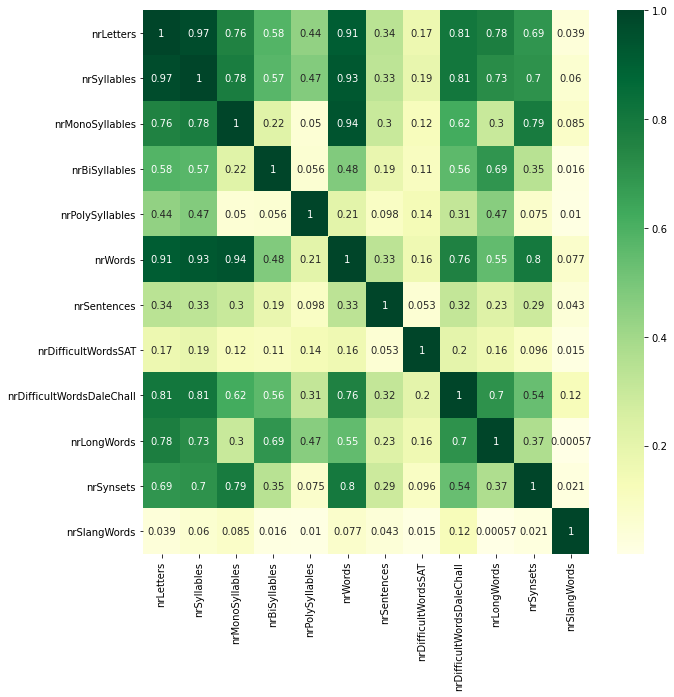

In [26]:
corrmatrix([x for x in dimensions['base'] if x not in postags])

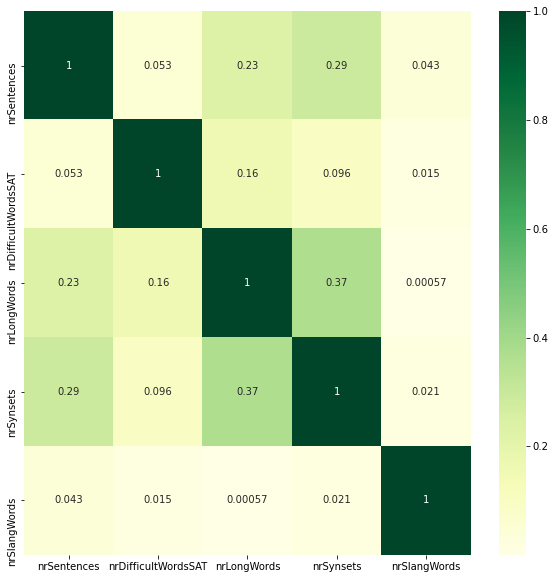

In [36]:
corrmatrix([x for x in dimensions['base'] if x not in list(postags) + ['nrSyllables', 'nrMonoSyllables', 'nrBiSyllables', 'nrPolySyllables', 'nrLetters', 'nrWords', 'nrDifficultWordsDaleChall']])

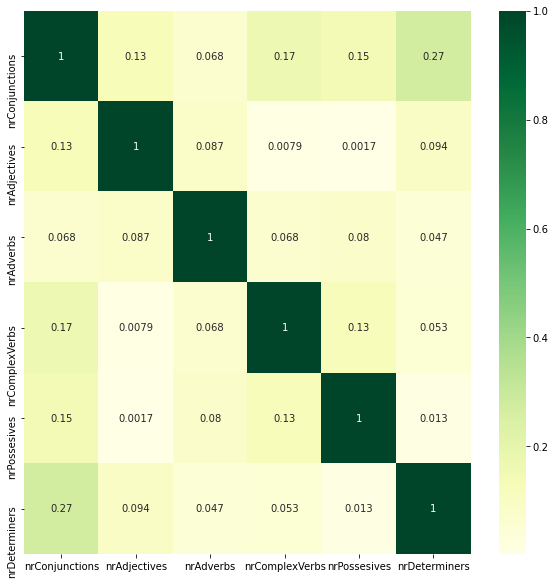

In [39]:
corrmatrix(dimensions['postag'])

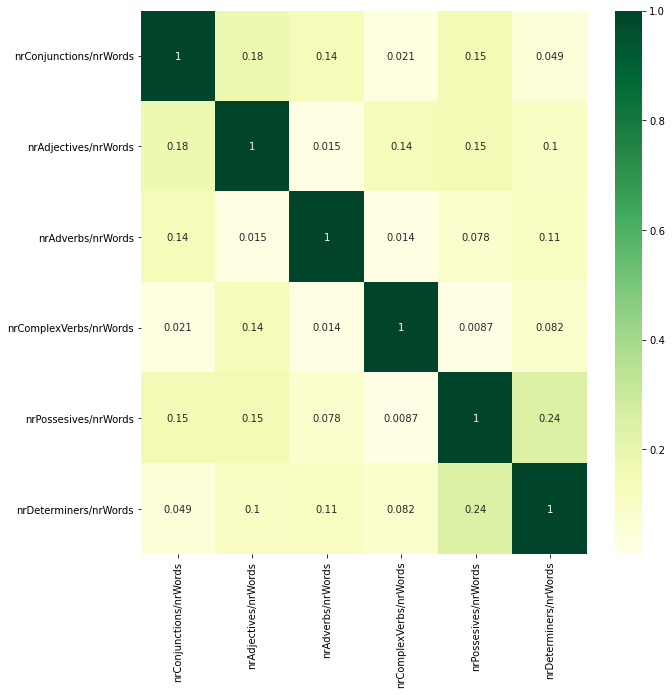

In [68]:
corrmatrix(dimensions['postagwords'])

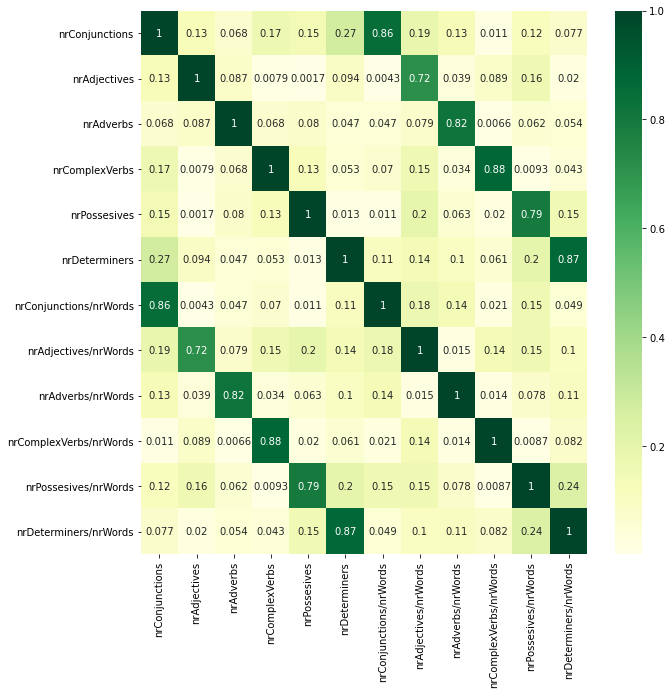

In [69]:
corrmatrix(dimensions['postag'] + dimensions['postagwords'])

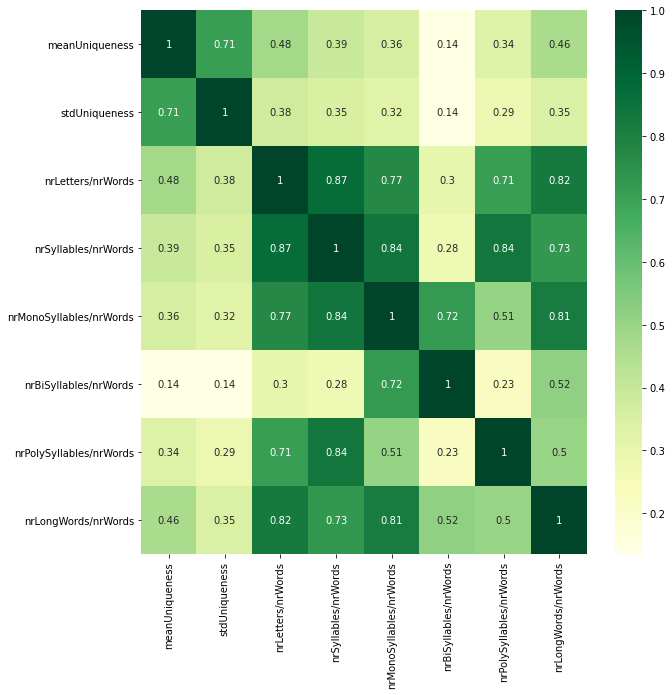

In [40]:
corrmatrix(dimensions['lexical'])

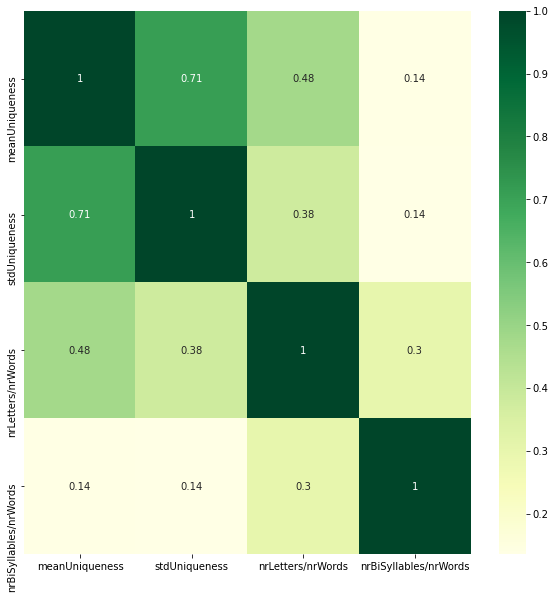

In [41]:
corrmatrix(['meanUniqueness', 'stdUniqueness', 'nrLetters/nrWords', 'nrBiSyllables/nrWords'])

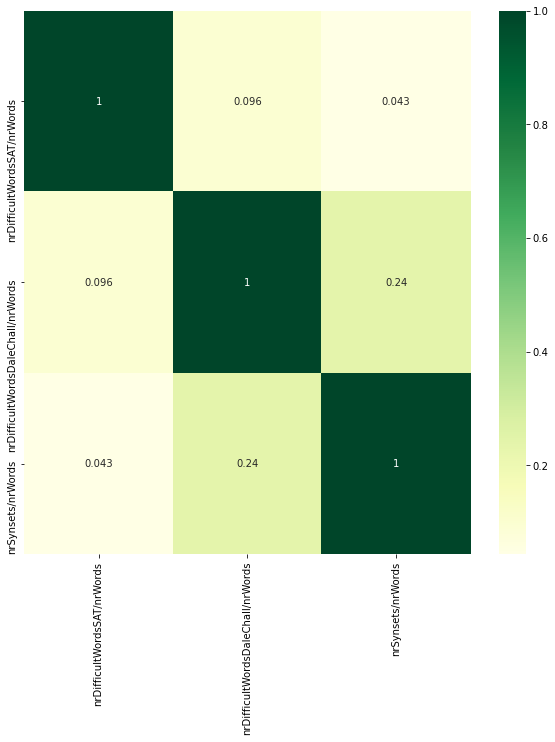

In [43]:
corrmatrix(dimensions['semantic'])

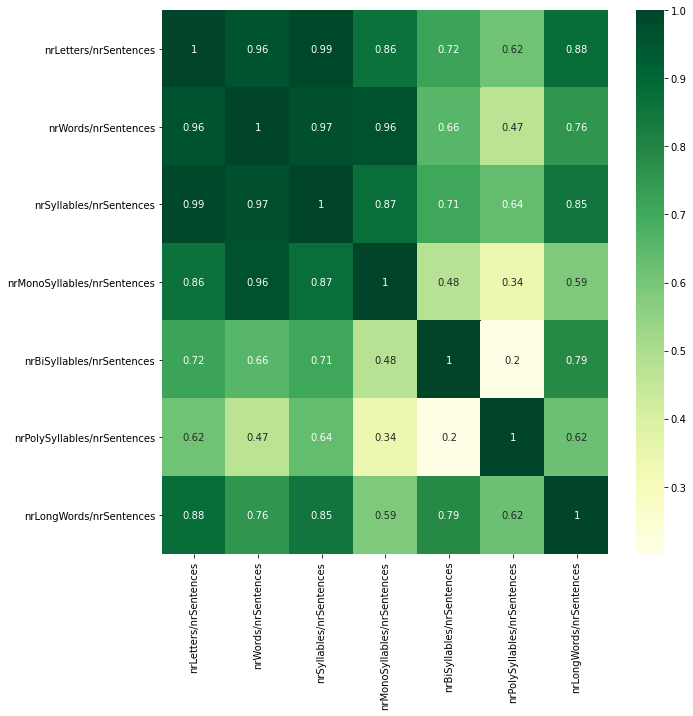

In [44]:
corrmatrix(dimensions['syntactic']) #pick nrWords/nrSentences

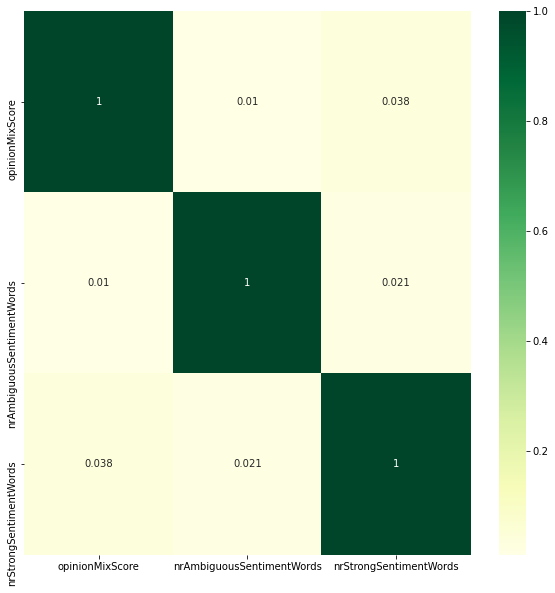

In [45]:
corrmatrix(dimensions['sentiment']) 

In [47]:
[x for x in dimensions['base'] if x not in list(postags) + ['nrSyllables', 'nrMonoSyllables', 'nrBiSyllables', 'nrPolySyllables', 'nrLetters', 'nrWords', 'nrDifficultWordsDaleChall']]

['nrSentences',
 'nrDifficultWordsSAT',
 'nrLongWords',
 'nrSynsets',
 'nrSlangWords']

In [70]:
pickedout = ['nrSentences',
 'nrLongWords',
 #'nrDifficultWordsDaleChall,
 #'nrSynsets',
 'nrSlangWords'] + dimensions['postagwords'] + ['meanUniqueness', 'stdUniqueness', 'nrLetters/nrWords', 'nrBiSyllables/nrWords'] + dimensions['semantic'] + ['nrWords/nrSentences'] + dimensions['sentiment']

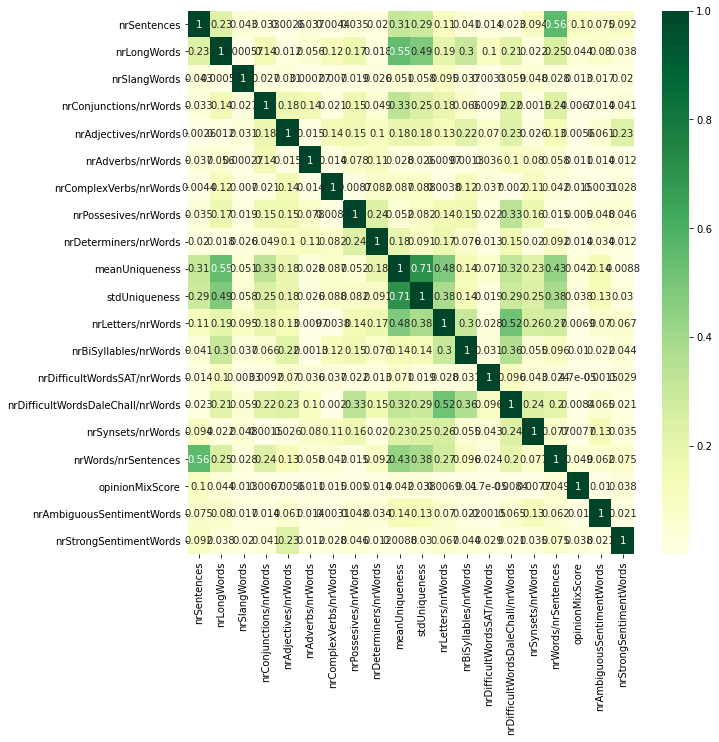

In [71]:
corrmatrix(pickedout)

In [73]:
pickle.dump(pickedout, open('./helpdata/pickedDimensions.pickle', 'wb'))

In [11]:
Xcr = add_constant(df[['opinionMixScore','nrStrongSentimentWords']])
VIF = pd.DataFrame([variance_inflation_factor(Xcr.values, i) for i in range(Xcr.shape[1])], index=Xcr.columns, columns=['VIF']).sort_values(by=['VIF'], axis=0)
VIF

,VIF
opinionMixScore,1.001481
nrStrongSentimentWords,1.001481
const,6.621151


In [72]:
Xcr = add_constant(df[pickedout])
VIF = pd.DataFrame([variance_inflation_factor(Xcr.values, i) for i in range(Xcr.shape[1])], index=Xcr.columns, columns=['VIF']).sort_values(by=['VIF'], axis=0)
VIF

,VIF
opinionMixScore,1.013830
nrDifficultWordsSAT/nrWords,1.034849
nrSlangWords,1.041320
nrAmbiguousSentimentWords,1.045573
nrStrongSentimentWords,1.083577
nrComplexVerbs/nrWords,1.086199
nrAdverbs/nrWords,1.128538
nrAdjectives/nrWords,1.273145
nrDeterminers/nrWords,1.277267
nrSynsets/nrWords,1.287609
